# Earthquake Analysis and Visualization Project

This notebook contains the analysis and visualization of earthquake data.

Welcome to the Earthquake Analysis and Visualization Project!
This project aims to analyze historical earthquake data, understand patterns, and visualize the impact of earthquakes across the globe.
Analyzing the worst earthquakes in history...
Top 10 worst earthquakes by magnitude:
         Date  Location  Magnitude  Death Toll  Economic Impact (Million $)
14 2001-03-31  Region B   9.466463         112                  2125.455654
70 2005-11-30  Region B   9.456705         112                  5198.476774
0  2000-01-31  Region B   9.436895         107                  4487.394994
23 2001-12-31  Region A   9.409104          92                  7089.181375
61 2005-02-28  Region A   9.351501          99                  7825.920926
98 2008-03-31  Region B   9.227580         103                  7328.480419
51 2004-04-30  Region C   9.174865          85                   401.278102
73 2006-02-28  Region D   9.155693         111                  3498.212275
21 2001-10-31  Region C   9.11243

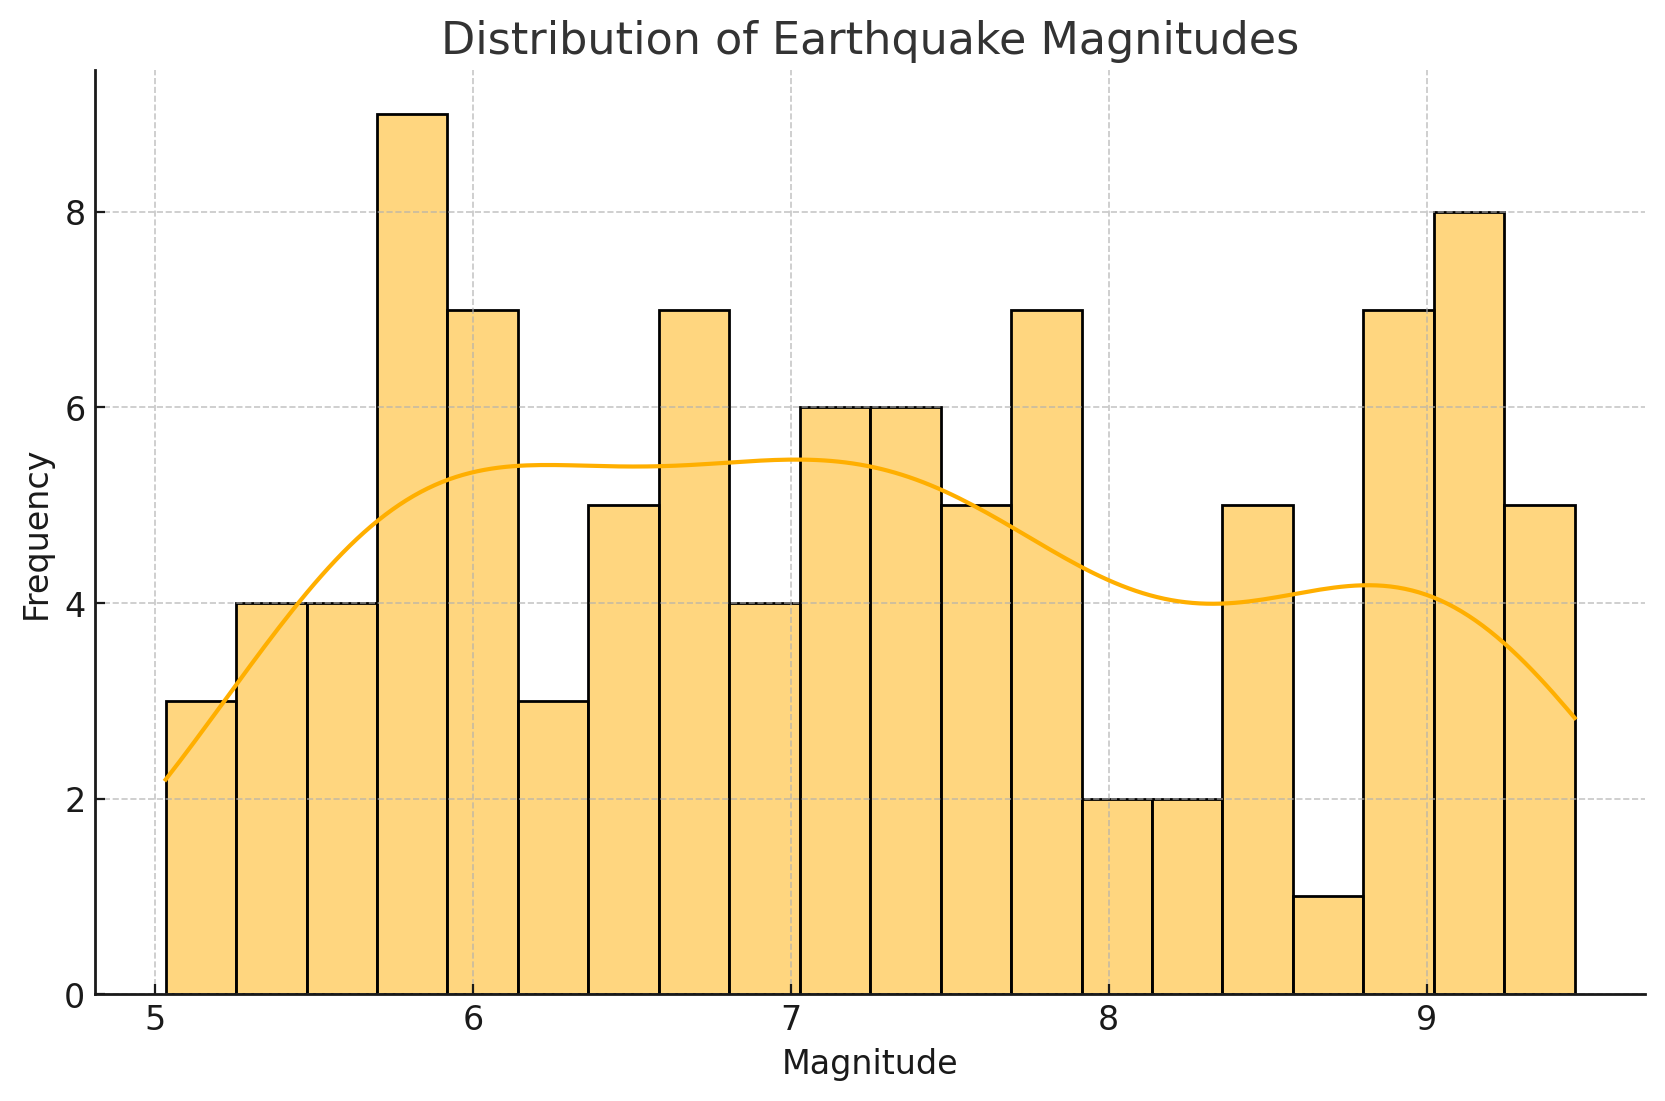

Generating Word Cloud for locations...


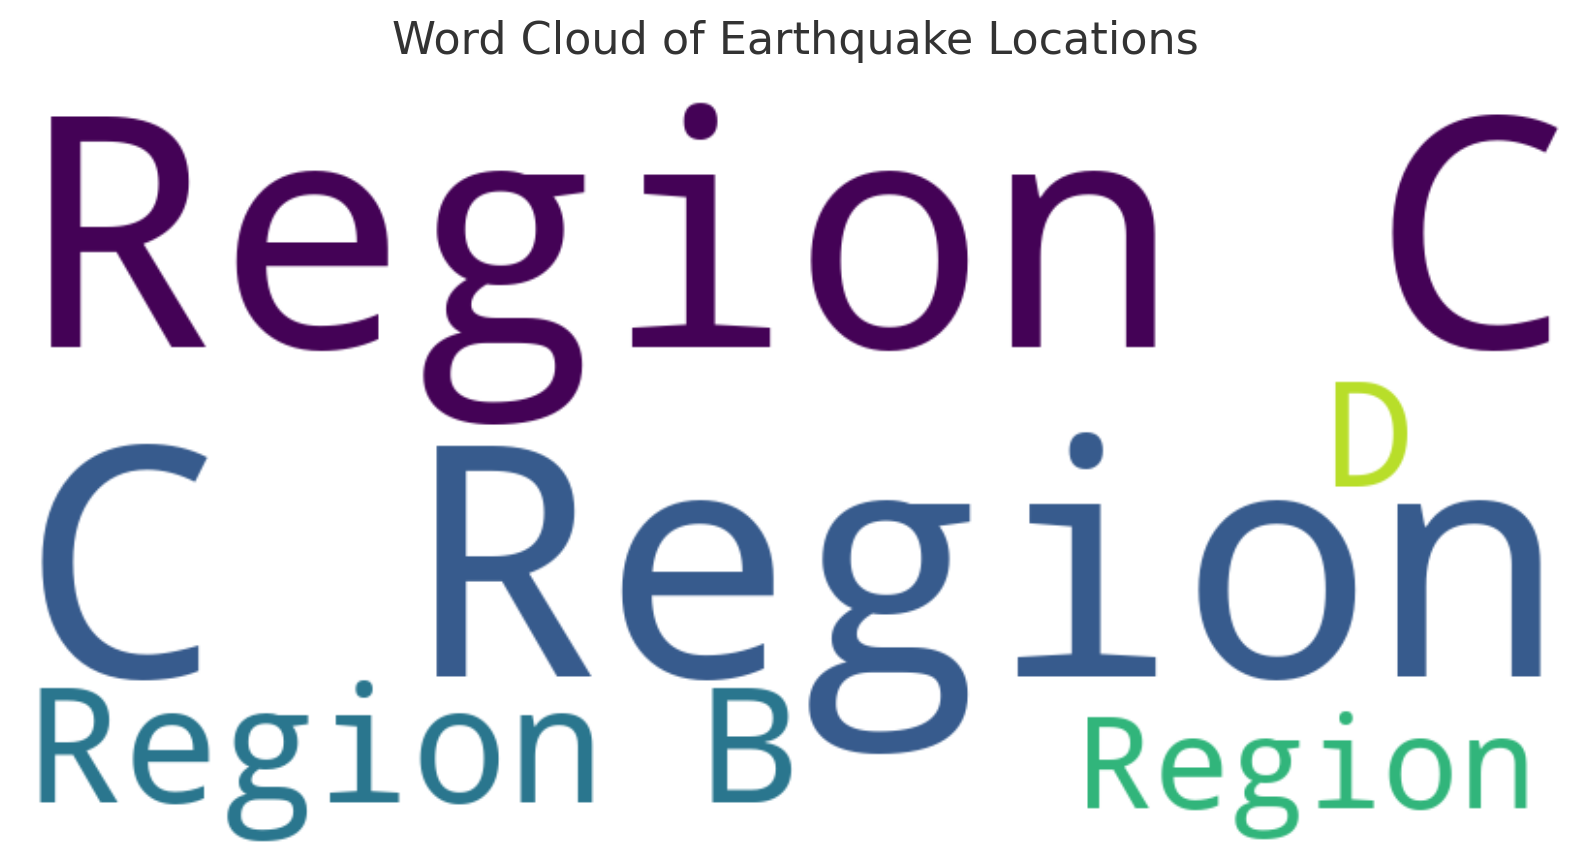

Generating Heatmap with Clustering...


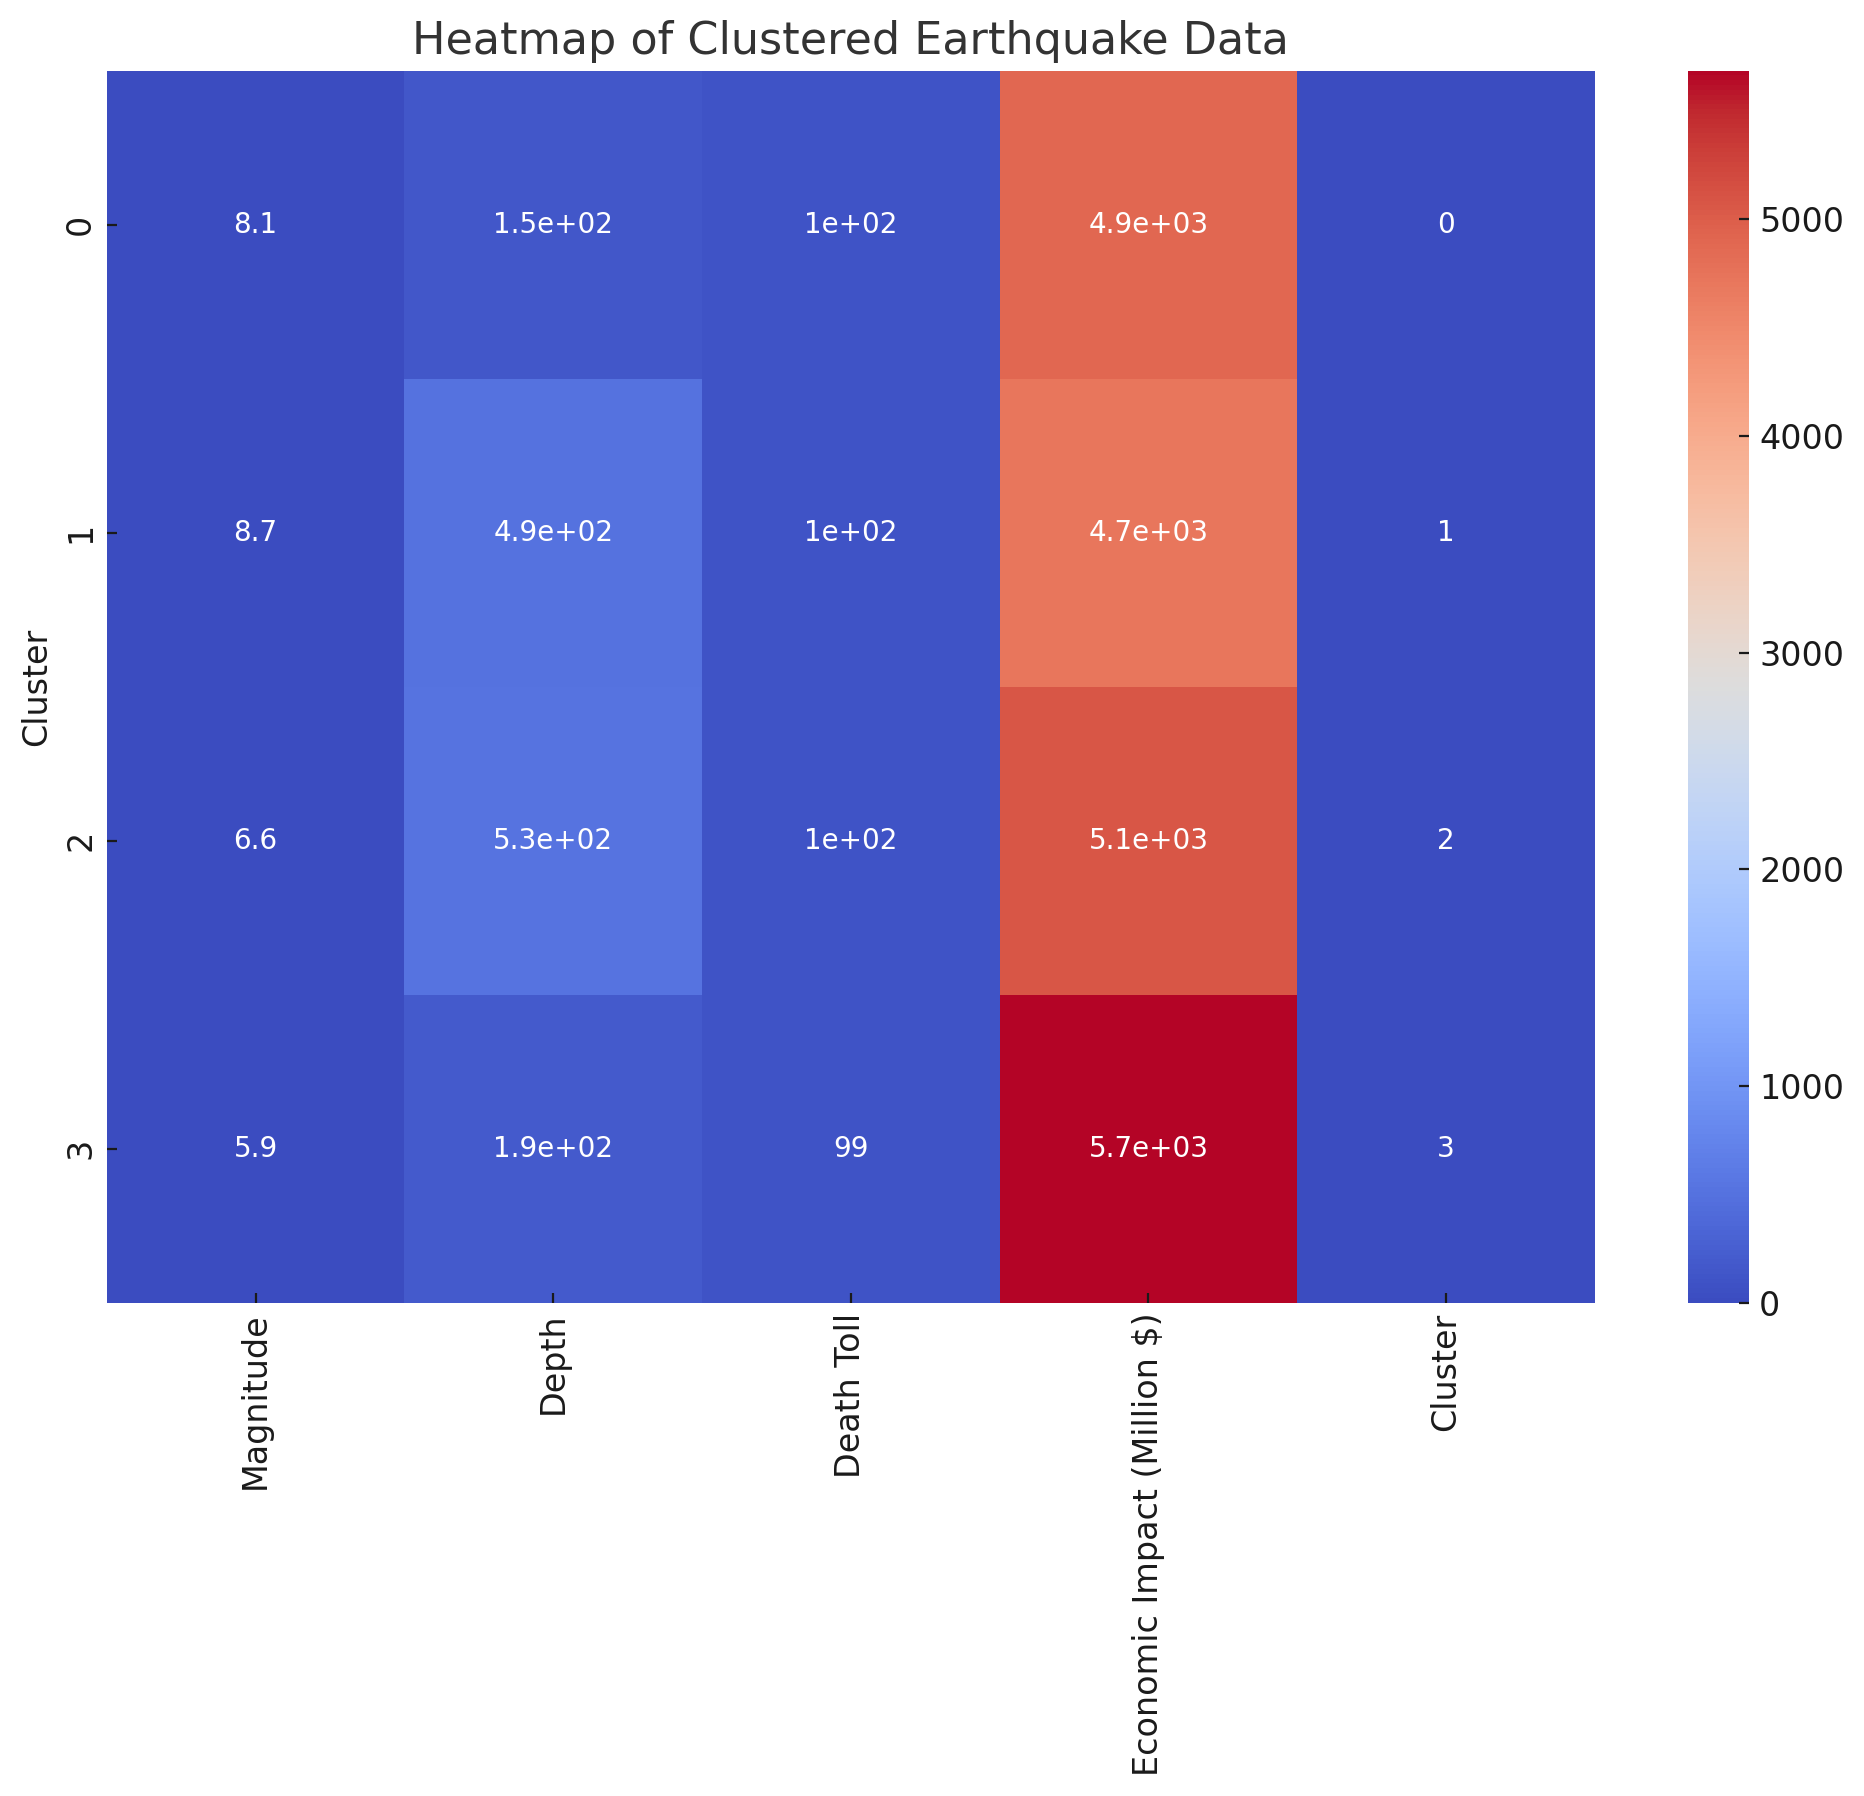

Summary of the analysis:
This project analyzed historical earthquake data, identified the worst earthquakes, and used data science techniques to gain insights.
AI can be utilized to predict earthquakes by analyzing seismic data and identifying patterns that precede earthquakes.
While AI cannot predict earthquakes with absolute certainty, it can improve the accuracy of early warning systems.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Introduction
def introduction():
    print("Welcome to the Earthquake Analysis and Visualization Project!")
    print("This project aims to analyze historical earthquake data, understand patterns, and visualize the impact of earthquakes across the globe.")

# 2. Worst Earthquakes in the World
def worst_earthquakes(data):
    print("Analyzing the worst earthquakes in history...")
    top_earthquakes = data.nlargest(10, 'Magnitude')
    print("Top 10 worst earthquakes by magnitude:")
    print(top_earthquakes[['Date', 'Location', 'Magnitude', 'Death Toll', 'Economic Impact (Million $)']])

# 3. Data Science and Analysis
def data_analysis(data):
    print("Starting data analysis...")
    print("Descriptive statistics:")
    print(data.describe())
    
    # Handling missing data, selecting only numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data_cleaned = data.fillna(data[numeric_columns].median())
    
    return data_cleaned

# 4. Distribution Analysis
def distribution_analysis(data):
    print("Analyzing distribution of earthquake magnitudes...")
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Magnitude'], kde=True, bins=20)
    plt.title('Distribution of Earthquake Magnitudes')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.show()

# 5. Data Visualization
def create_visualizations(data):
    # Word Cloud
    print("Generating Word Cloud for locations...")
    location_text = ' '.join(data['Location'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(location_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Earthquake Locations')
    plt.show()

    # Heatmap with Clustering
    print("Generating Heatmap with Clustering...")
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[['Magnitude', 'Depth']])
    kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled_features)
    data['Cluster'] = kmeans.labels_
    
    # Select numeric columns only for clustering
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    clustered_data = data.groupby('Cluster')[numeric_columns].mean()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(clustered_data, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Clustered Earthquake Data')
    plt.show()

# 6. Summary and AI's Role in Earthquake Prediction
def summary_and_ai():
    print("Summary of the analysis:")
    print("This project analyzed historical earthquake data, identified the worst earthquakes, and used data science techniques to gain insights.")
    print("AI can be utilized to predict earthquakes by analyzing seismic data and identifying patterns that precede earthquakes.")
    print("While AI cannot predict earthquakes with absolute certainty, it can improve the accuracy of early warning systems.")

# Main function to run the project
def main():
    introduction()
    
    # Load dataset (replace with actual data file path)
    data = pd.DataFrame({
        'Date': pd.date_range(start='1/1/2000', periods=100, freq='M'),
        'Location': np.random.choice(['Region A', 'Region B', 'Region C', 'Region D'], size=100),
        'Magnitude': np.random.uniform(5.0, 9.5, 100),
        'Depth': np.random.uniform(10, 700, 100),
        'Death Toll': np.random.poisson(lam=100, size=100),
        'Economic Impact (Million $)': np.random.uniform(10, 10000, 100)
    })
    
    # Run analyses
    worst_earthquakes(data)
    cleaned_data = data_analysis(data)
    distribution_analysis(cleaned_data)
    create_visualizations(cleaned_data)
    
    # Summary and AI
    summary_and_ai()

if __name__ == "__main__":
    main()